In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from method_wrapper import method_wrapper

In [3]:
# get all folder paths:

# set up paths
in_dir = "../Raw Data/Applied Acoustics/"
folders = sorted(os.listdir(in_dir))

# remove hidden folders
folders = [folder for folder in folders if '.' not in folder]

methods = ["beamforming", "pseudo_intensity", "allrad_decoder", "allrad2_decoder", "mad_decoder"]

# create empty Dataframes to store results in
TS_results = pd.DataFrame()
TH_results = pd.DataFrame()
delta_results = pd.DataFrame()

# iterate through folders and methods
for folder in folders:
    print(folder)
    path = in_dir + folder + "/HOA/"
    print(path)
    for method in methods:
        try:
            TS, TH = method_wrapper(method, path)
            print(method, "TS:", TS, "TH:", TH)
        except:
            print(method, "not working")
            TS = None
            TH = None

        # save data
        TS_results.loc[folder, method] = TS
        TH_results.loc[folder, method] = TH
        try:
            delta_results.loc[folder, method] = TS - TH

        except:
            delta_results.loc[folder, method] = None


    print("")

A10p
../Raw Data/Applied Acoustics/A10p/HOA/
beamforming TS: 24.345310773635607 TH: -6.013554069010725
pseudo_intensity not working
allrad_decoder TS: -5.999971353295513 TH: -6.297198641345218
allrad2_decoder TS: -6.009815935211549 TH: -7.083932221339171
mad_decoder TS: nan TH: nan

A11p
../Raw Data/Applied Acoustics/A11p/HOA/
beamforming TS: 2.459691197061812 TH: -2.0593287018005486
pseudo_intensity not working


c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:19: RuntimeWarning: invalid value encountered in log10
  TH = 20*np.log10((top)/(left + right + back))
c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:21: RuntimeWarning: invalid value encountered in log10
  TS = 20*np.log10((top)/(left + right))


allrad_decoder TS: -5.999971353295513 TH: -6.297198641345218
allrad2_decoder TS: -6.009815935211549 TH: -7.083932221339171
mad_decoder TS: nan TH: nan

A20p
../Raw Data/Applied Acoustics/A20p/HOA/
beamforming TS: 24.335415264546345 TH: -4.092893860198384
pseudo_intensity not working


c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:19: RuntimeWarning: invalid value encountered in log10
  TH = 20*np.log10((top)/(left + right + back))
c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:21: RuntimeWarning: invalid value encountered in log10
  TS = 20*np.log10((top)/(left + right))


allrad_decoder TS: -5.999971353295513 TH: -6.297198641345218
allrad2_decoder TS: -6.009815935211549 TH: -7.083932221339171
mad_decoder TS: nan TH: nan

A21p
../Raw Data/Applied Acoustics/A21p/HOA/
beamforming TS: 5.948817827934816 TH: 0.07086301082710883
pseudo_intensity not working


c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:19: RuntimeWarning: invalid value encountered in log10
  TH = 20*np.log10((top)/(left + right + back))
c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:21: RuntimeWarning: invalid value encountered in log10
  TS = 20*np.log10((top)/(left + right))


allrad_decoder TS: -5.999971353295513 TH: -6.297198641345218
allrad2_decoder TS: -6.009815935211549 TH: -7.083932221339171
mad_decoder TS: nan TH: nan

A30p
../Raw Data/Applied Acoustics/A30p/HOA/
beamforming TS: -6.164579443408352 TH: 2.1976843466043627
pseudo_intensity not working


c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:19: RuntimeWarning: invalid value encountered in log10
  TH = 20*np.log10((top)/(left + right + back))
c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:21: RuntimeWarning: invalid value encountered in log10
  TS = 20*np.log10((top)/(left + right))


allrad_decoder TS: -5.999971353295513 TH: -6.296621075022239
allrad2_decoder TS: -6.009815935211549 TH: -7.083588170616382
mad_decoder TS: nan TH: nan

A31p
../Raw Data/Applied Acoustics/A31p/HOA/
beamforming TS: -6.628375444736312 TH: 0.9982965468830635
pseudo_intensity not working


c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:19: RuntimeWarning: invalid value encountered in log10
  TH = 20*np.log10((top)/(left + right + back))
c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:21: RuntimeWarning: invalid value encountered in log10
  TS = 20*np.log10((top)/(left + right))


allrad_decoder TS: -5.999971353295513 TH: -6.297198641345218
allrad2_decoder TS: -6.009815935211549 TH: -7.083932221339171
mad_decoder TS: nan TH: nan

B10p
../Raw Data/Applied Acoustics/B10p/HOA/
beamforming TS: -4.94865974915502 TH: 13.454153145716322
pseudo_intensity not working


c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:19: RuntimeWarning: invalid value encountered in log10
  TH = 20*np.log10((top)/(left + right + back))
c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:21: RuntimeWarning: invalid value encountered in log10
  TS = 20*np.log10((top)/(left + right))


allrad_decoder TS: -5.999971353295513 TH: -6.296909862984366
allrad2_decoder TS: -6.009815935211549 TH: -7.083755900733587
mad_decoder TS: nan TH: nan

B11p
../Raw Data/Applied Acoustics/B11p/HOA/
beamforming TS: -4.948717191004479 TH: 13.454083468750916
pseudo_intensity not working


c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:19: RuntimeWarning: invalid value encountered in log10
  TH = 20*np.log10((top)/(left + right + back))
c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:21: RuntimeWarning: invalid value encountered in log10
  TS = 20*np.log10((top)/(left + right))


allrad_decoder TS: -5.999971353295513 TH: -6.297198641345218
allrad2_decoder TS: -6.009815935211549 TH: -7.083932221339171
mad_decoder TS: nan TH: nan

B20p
../Raw Data/Applied Acoustics/B20p/HOA/
beamforming TS: 2.0210065750510866 TH: 3.4485522389458527
pseudo_intensity not working


c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:19: RuntimeWarning: invalid value encountered in log10
  TH = 20*np.log10((top)/(left + right + back))
c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:21: RuntimeWarning: invalid value encountered in log10
  TS = 20*np.log10((top)/(left + right))


allrad_decoder TS: -5.999971353295513 TH: -6.296909862984366
allrad2_decoder TS: -6.009815935211549 TH: -7.083755900733587
mad_decoder TS: nan TH: nan

B21p
../Raw Data/Applied Acoustics/B21p/HOA/
beamforming TS: -1.2481593552089216 TH: 11.161507016183695
pseudo_intensity not working


c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:19: RuntimeWarning: invalid value encountered in log10
  TH = 20*np.log10((top)/(left + right + back))
c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:21: RuntimeWarning: invalid value encountered in log10
  TS = 20*np.log10((top)/(left + right))


allrad_decoder TS: -5.999971353295513 TH: -6.297198641345218
allrad2_decoder TS: -6.009815935211549 TH: -7.083932221339171
mad_decoder TS: nan TH: nan

B30p
../Raw Data/Applied Acoustics/B30p/HOA/
beamforming TS: -6.156178359865896 TH: 2.2132791693481004
pseudo_intensity not working


c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:19: RuntimeWarning: invalid value encountered in log10
  TH = 20*np.log10((top)/(left + right + back))
c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:21: RuntimeWarning: invalid value encountered in log10
  TS = 20*np.log10((top)/(left + right))


allrad_decoder TS: -5.999971353295513 TH: -6.297198641345218
allrad2_decoder TS: -6.009815935211549 TH: -7.083932221339171
mad_decoder TS: nan TH: nan

B31p
../Raw Data/Applied Acoustics/B31p/HOA/
beamforming TS: -6.618924593429111 TH: 1.0104711557508437
pseudo_intensity not working


c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:19: RuntimeWarning: invalid value encountered in log10
  TH = 20*np.log10((top)/(left + right + back))
c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:21: RuntimeWarning: invalid value encountered in log10
  TS = 20*np.log10((top)/(left + right))


allrad_decoder TS: -6.000279339414924 TH: -6.296975291883177
allrad2_decoder TS: -6.00997467249666 TH: -7.08376747711354
mad_decoder TS: nan TH: nan

C10p
../Raw Data/Applied Acoustics/C10p/HOA/
beamforming TS: -8.69803323683069 TH: 1.7118784980798862
pseudo_intensity not working


c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:19: RuntimeWarning: invalid value encountered in log10
  TH = 20*np.log10((top)/(left + right + back))
c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:21: RuntimeWarning: invalid value encountered in log10
  TS = 20*np.log10((top)/(left + right))


allrad_decoder TS: -5.999971353295513 TH: -6.297198641345218
allrad2_decoder TS: -6.009815935211549 TH: -7.083932221339171
mad_decoder TS: nan TH: nan

C11p
../Raw Data/Applied Acoustics/C11p/HOA/
beamforming TS: -9.384470236056817 TH: -0.4771977786815398
pseudo_intensity not working


c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:19: RuntimeWarning: invalid value encountered in log10
  TH = 20*np.log10((top)/(left + right + back))
c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:21: RuntimeWarning: invalid value encountered in log10
  TS = 20*np.log10((top)/(left + right))


allrad_decoder TS: -5.999971353295513 TH: -6.296909862984366
allrad2_decoder TS: -6.009815935211549 TH: -7.083755900733587
mad_decoder TS: nan TH: nan

C20p
../Raw Data/Applied Acoustics/C20p/HOA/
beamforming TS: -5.666452492783397 TH: 5.424830147760856
pseudo_intensity not working


c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:19: RuntimeWarning: invalid value encountered in log10
  TH = 20*np.log10((top)/(left + right + back))
c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:21: RuntimeWarning: invalid value encountered in log10
  TS = 20*np.log10((top)/(left + right))


allrad_decoder TS: -5.999971353295513 TH: -6.297198641345218
allrad2_decoder TS: -6.009815935211549 TH: -7.083932221339171
mad_decoder TS: nan TH: nan

C21p
../Raw Data/Applied Acoustics/C21p/HOA/
beamforming TS: -6.3573281096453105 TH: 2.9767551278852604
pseudo_intensity not working


c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:19: RuntimeWarning: invalid value encountered in log10
  TH = 20*np.log10((top)/(left + right + back))
c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:21: RuntimeWarning: invalid value encountered in log10
  TS = 20*np.log10((top)/(left + right))


allrad_decoder TS: -5.999971353295513 TH: -6.297198641345218
allrad2_decoder TS: -6.009815935211549 TH: -7.083932221339171
mad_decoder TS: nan TH: nan

C30p
../Raw Data/Applied Acoustics/C30p/HOA/
beamforming TS: -6.259762037187851 TH: 2.209035498806842
pseudo_intensity not working


c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:19: RuntimeWarning: invalid value encountered in log10
  TH = 20*np.log10((top)/(left + right + back))
c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:21: RuntimeWarning: invalid value encountered in log10
  TS = 20*np.log10((top)/(left + right))


allrad_decoder TS: -5.999971353295513 TH: -6.297198641345218
allrad2_decoder TS: -6.009815935211549 TH: -7.083932221339171
mad_decoder TS: nan TH: nan

C31p
../Raw Data/Applied Acoustics/C31p/HOA/
beamforming TS: -6.7611196354481145 TH: 0.90623581825232
pseudo_intensity not working


c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:19: RuntimeWarning: invalid value encountered in log10
  TH = 20*np.log10((top)/(left + right + back))
c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:21: RuntimeWarning: invalid value encountered in log10
  TS = 20*np.log10((top)/(left + right))


allrad_decoder TS: -6.000279339414924 TH: -6.296975291883177
allrad2_decoder TS: -6.00997467249666 TH: -7.08376747711354
mad_decoder TS: nan TH: nan

ORG
../Raw Data/Applied Acoustics/ORG/HOA/
beamforming TS: -12.356379254246583 TH: -10.625344735688024
pseudo_intensity not working


c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:19: RuntimeWarning: invalid value encountered in log10
  TH = 20*np.log10((top)/(left + right + back))
c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:21: RuntimeWarning: invalid value encountered in log10
  TS = 20*np.log10((top)/(left + right))


allrad_decoder TS: -5.999971353295513 TH: -6.297198641345218
allrad2_decoder TS: -6.009815935211549 TH: -7.083932221339171
mad_decoder TS: nan TH: nan



c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:19: RuntimeWarning: invalid value encountered in log10
  TH = 20*np.log10((top)/(left + right + back))
c:\Users\fulbr\OneDrive\Documents\01 Uni OneDrive\11 WiSe 2324\02 Virtuelle Akustik\Projekt\VAR-Project\Code\method_wrapper.py:21: RuntimeWarning: invalid value encountered in log10
  TS = 20*np.log10((top)/(left + right))


In [4]:
# create out folder
os.makedirs("../out", exist_ok=True)

# write dataframe to excel
with pd.ExcelWriter('../out/results.xlsx', engine='openpyxl') as writer:
    TS_results.to_excel(writer, sheet_name='TS')
    TH_results.to_excel(writer, sheet_name='TH')
    delta_results.to_excel(writer, sheet_name='delta')

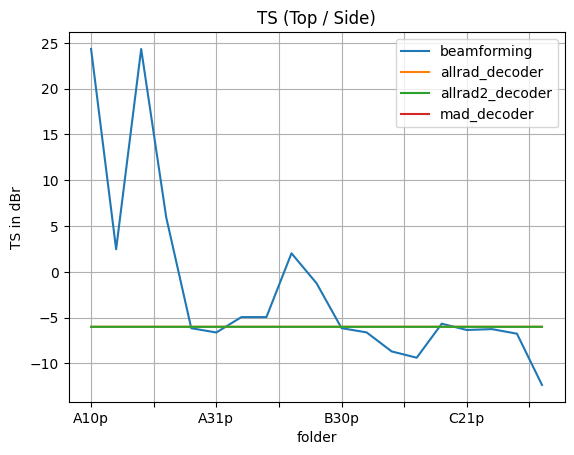

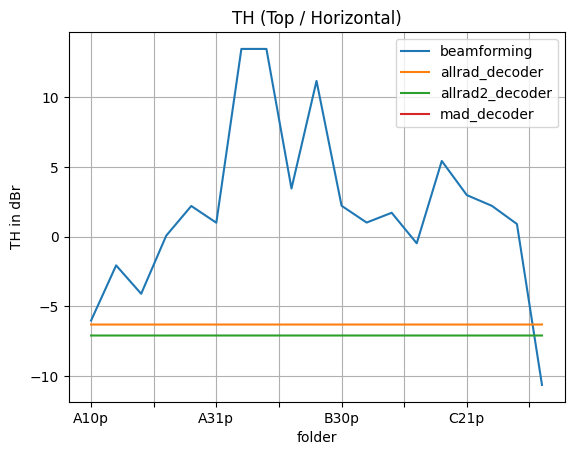

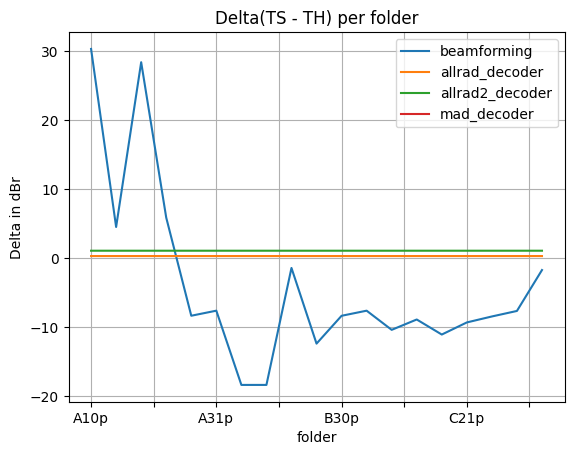

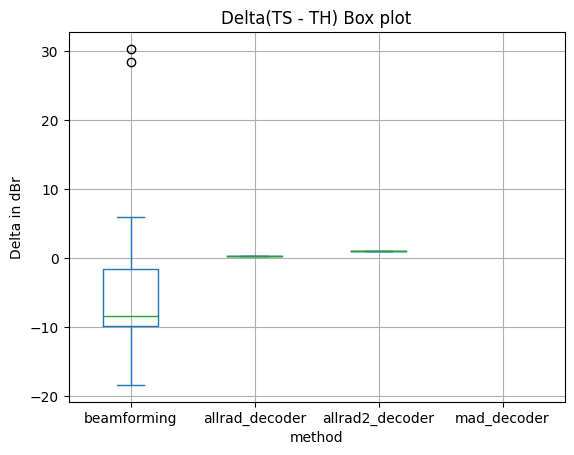

In [27]:
# plot and save results
 
TS_results.plot()
plt.title('TS (Top / Side)')
plt.xlabel('folder')
plt.ylabel('TS in dBr')
plt.grid()

plt.savefig('../out/TS.png')
plt.show()


TH_results.plot()
plt.title('TH (Top / Horizontal)')
plt.xlabel('folder')
plt.ylabel('TH in dBr')
plt.grid()

plt.savefig('../out/TH.png')
plt.show()


delta_results.plot()
plt.title('Delta(TS - TH) per folder')
plt.xlabel('folder')
plt.ylabel('Delta in dBr')
plt.grid()

plt.savefig('../out/Delta.png')
plt.show()


delta_results.plot(kind='box')
plt.title('Delta(TS - TH) Box plot')
plt.xlabel('method')
plt.ylabel('Delta in dBr')
plt.grid()
plt.savefig('../out/Delta_boxplot.png')
plt.show()


why is mad not working ???